# Evaluación final - Módulo 3 Adalab

Nombre: Zara Valentinova


In [210]:
# Importación de librerías

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# from scipy.stats import shapiro, kstest


In [211]:
flights=pd.read_csv("Customer Flight Activity.csv")
loyalty=pd.read_csv("Customer Loyalty History.csv")

# Fase 1

## 1. Exploración inicial

Primero vemos las características de las variables que constituyen cada conjunto de datos.

### 1.1. Exploramos flights y vemos que:

- Nuestro DataFrame contiene 405624 filas y 10 columnas
- Solo contiene variables numéricas.
- No hay valores nulos, pero sí muchos ceros.
- Hay 3712 filas duplicadas. No vemos un motivo para mantener los duplicados, así que los borramos, dejando solo la primera aparición de cada. Así, nuestro DataFrame pasa a ser de 403760 filas.
- Variable Loyalty Number: contiene valores duplicados.porque el DataFrame incluye registros del 2017 y 2018 por mes, con lo cual hay clientes que constan en el registro de cada uno de los años aun si no han volado ambos. Observamos que hay más de un registro por loyalty number, year y month: habrá que sumar los valores de las demás columnas de esos registros y dejar un solo registro por loyalty number, year y month (ver Limpieza).



In [212]:
flights.shape

(405624, 10)

In [213]:
flights.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [214]:
flights.isna().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [215]:
flights.duplicated().any()


np.True_

In [216]:
flights = flights.drop_duplicates(keep='first')
flights


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0


In [217]:
flights["Loyalty Number"].unique()

array([100018, 100102, 100140, ..., 999731, 999788, 999891],
      shape=(16737,))

In [218]:
flights.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,403760.0,549875.383713,258961.514684,100018.0,326699.0,550598.0,772152.0,999986.0
Year,403760.0,2017.500352,0.500000,2017.0,2017.0,2018.0,2018.0,2018.0
Month,403760.0,6.501335,3.451982,1.0,4.0,7.0,10.0,12.0
Flights Booked,403760.0,4.134050,5.230064,0.0,0.0,1.0,8.0,21.0
Flights with Companions,403760.0,1.036569,2.080472,0.0,0.0,0.0,1.0,11.0
Total Flights,403760.0,5.170619,6.526858,0.0,0.0,1.0,10.0,32.0
Distance,403760.0,1214.460979,1434.098521,0.0,0.0,525.0,2342.0,6293.0
Points Accumulated,403760.0,124.263761,146.696179,0.0,0.0,53.0,240.0,676.5
Points Redeemed,403760.0,30.838587,125.758002,0.0,0.0,0.0,0.0,876.0
Dollar Cost Points Redeemed,403760.0,2.495973,10.172033,0.0,0.0,0.0,0.0,71.0


In [219]:
flights["Year"].unique()

array([2017, 2018])

In [220]:
# flights2017= flights[flights["Year"] == 2017]
# flights2017

### 1.2. Exploramos loyalty y vemos que:

- Nuestro DataFrame contiene 16737 filas y 16 columnas
- Contiene siete variables numéricas y nueve de tipo objeto.
- Tres de las variables contienen valores nulos: Salary (4238 nulos), Cancellation Year y Cancellation Month (14670 nulos cada). Esto podría indicar que estos usuarios siguen activos.
- No hay filas duplicadas.
- Al explorar las principales estadísticas, vemos que la columna Salary contiene valores negativos, lo cual tendremos que corregir. 
- También confirmamos que la columna Loyalty Number solo contiene valores únicos, lo cual tiene sentido dado que se trata de un conjunto de datos en el que cada cliente solo puede constrar una vez (a diferencia de flights).

In [221]:
loyalty.shape

(16737, 16)

In [222]:
loyalty.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [223]:
loyalty.isna().sum()

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [224]:
loyalty.duplicated().any()

np.False_

In [225]:
loyalty.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


## 1.3. Unión de los dos conjuntos de datos

Uniremos los dos conjuntos de datos a través de la columna Loyalty History. Los valores existentes de la columna en flights coincide con los de loyalty, indicando que ninguno de los dos contiene información sobre usuarios que no se encuentran en el otro. El tipo de unión será un merge. Más específicamente, un inner merge (dado que ambos incluyen los mismos valores en Royalty Number).

In [226]:
df=flights.merge(loyalty, on="Loyalty Number")

In [227]:
flights.shape

(403760, 10)

In [228]:
loyalty.shape

(16737, 16)

In [229]:
df.shape # El número de columnas es el correcto (Loyalty Number aparece solo una vez)

(403760, 25)

## 2. Limpieza

Observamos que hay más de un registro por loyalty number, year y month: Es algo que consultar con la compañía. 

In [230]:
""""""Hemos visto que en  168 filas filas, la información en las columnas abajo coincide. Esto puede indicar dos cosas:
- hay diferentes fuentes de las que hemos obtenido los datos, ambas son válidas (menos probable porque )
- error en la recopilación de datos. No obstante, no sabemos cual de los duplicados tomar por correcto, así que tendremos que comprobarlo con la empresa."""
# df.duplicated(subset=["Loyalty Number", "Year", "Month", "Flights Booked"]).any()

df[
    df.duplicated(
        subset=["Loyalty Number", "Year", "Month", "Flights Booked", "Flights with Companions"],
        keep=False
    )
]

# Por el momento dejamos estos registros como están."""

SyntaxError: invalid syntax (3013750775.py, line 1)

In [ ]:
""""""Hemos visto que en  68 filas filas, la información en las columnas abajo coincide. Esto puede indicar dos cosas:
- hay diferentes fuentes de las que hemos obtenido los datos, ambas son válidas (menos probable porque )
- error en la recopilación de datos. No obstante, no sabemos cual de los duplicados tomar por correcto, así que tendremos que comprobarlo con la empresa."""
# df.duplicated(subset=["Loyalty Number", "Year", "Month", "Flights Booked", "Flights with Companions", "Total Flights"]).any()

df[
    df.duplicated(
        subset=["Loyalty Number", "Year", "Month", "Flights Booked", "Flights with Companions"],
        keep=False
    )
]

# Por el momento dejamos estos registros como están."""

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
44592,582493,2018,3,3,3,6,3864,482.5,512,41,Canada,New Brunswick,Fredericton,E3B 2H2,Male,Bachelor,69524.0,Married,Nova,7434.25,Standard,2014,9,NaN,NaN
45551,738567,2017,3,3,0,3,276,27.0,0,0,Canada,New Brunswick,Fredericton,E3B 2H2,Male,Bachelor,61554.0,Divorced,Star,2728.84,Standard,2018,10,NaN,NaN
45552,738567,2017,3,3,0,3,1077,107.0,0,0,Canada,New Brunswick,Fredericton,E3B 2H2,Male,Bachelor,61554.0,Divorced,Star,2728.84,Standard,2018,10,NaN,NaN
52241,200519,2017,4,4,0,4,1224,122.0,0,0,Canada,Quebec,Quebec City,G1B 3L5,Male,Bachelor,63899.0,Single,Aurora,13448.81,Standard,2016,9,NaN,NaN
52242,200519,2017,4,4,0,4,1900,190.0,0,0,Canada,Quebec,Quebec City,G1B 3L5,Male,Bachelor,63899.0,Single,Aurora,13448.81,Standard,2016,9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385007,897772,2018,11,3,0,3,1641,164.0,0,0,Canada,Quebec,Montreal,H2Y 4R4,Male,High School or Below,44490.0,Divorced,Star,8123.96,Standard,2012,9,NaN,NaN
388929,208241,2018,12,13,0,13,4316,431.0,0,0,Canada,Manitoba,Winnipeg,R6Y 4T5,Male,Bachelor,50170.0,Married,Nova,3576.71,Standard,2018,10,NaN,NaN
388930,208241,2018,12,13,0,13,1443,144.0,0,0,Canada,Manitoba,Winnipeg,R6Y 4T5,Male,Bachelor,50170.0,Married,Nova,3576.71,Standard,2018,10,NaN,NaN
401944,902608,2018,12,12,0,12,3024,302.0,0,0,Canada,British Columbia,Victoria,V10 6T5,Male,Bachelor,65844.0,Single,Nova,8618.30,Standard,2012,8,NaN,NaN


### Gestión de nulos
Vemos que en nuestro DataFrame los nulos que provenían de Loyalti ahora han incrementado, debido a la unión que hemos realizado.

In [ ]:
df.isna().sum()

Loyalty Number                      0
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102260
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              354110
Cancellation Month             354110
dtype: int64

In [ ]:
df_nulos = df[df["Salary"].isna()]
df_nulos.sample(5)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
294654,570406,2018,6,18,6,24,2880,288.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Married,Nova,9657.58,Standard,2015,10,NaN,NaN
172149,316527,2017,11,9,1,10,3300,330.0,0,0,Canada,British Columbia,West Vancouver,V6V 8Z3,Male,College,NaN,Married,Nova,2767.50,Standard,2012,6,NaN,NaN
78779,718409,2017,5,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1J 8T7,Female,College,NaN,Divorced,Aurora,6039.02,Standard,2012,12,NaN,NaN
212358,667262,2018,1,2,0,2,1642,164.0,0,0,Canada,British Columbia,West Vancouver,V6V 8Z3,Female,College,NaN,Single,Nova,3341.68,Standard,2015,2,NaN,NaN
111497,669894,2017,7,20,0,20,1500,150.0,0,0,Canada,Quebec,Montreal,H2T 2J6,Male,College,NaN,Single,Nova,22062.55,Standard,2014,1,NaN,NaN


In [ ]:
df_nulos["Education"].unique()

array(['College'], dtype=object)

In [ ]:
df["Education"].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [ ]:
df[df["Salary"].notna()]["Education"].unique()


array(['Bachelor', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [ ]:
# vemos que los valores NAN de Salary corresponden a todos los usuarios que tienen el valor "College" en Education. No parece haber ninguna otra relación. Dejamos los nulos como están.

In [ ]:
df.shape

(403760, 25)

In [ ]:
df.isna().sum()

Loyalty Number                      0
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102260
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              354110
Cancellation Month             354110
dtype: int64

In [ ]:
# Los nulos de Cancelation Date y Cancelation Month se deben, efectivamente, a que los usuarios en cuestión no han cancelado su membresía en el programa de lealtad.

In [ ]:
df["Salary"].min

<bound method Series.min of 0          92552.0
1              NaN
2              NaN
3          63253.0
4          91163.0
            ...   
403755         NaN
403756    217943.0
403757     47670.0
403758         NaN
403759     46594.0
Name: Salary, Length: 403760, dtype: float64>

In [242]:
df.nsmallest(1000, "Salary").head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
4924,366599,2017,January,11,0,11,3014,301.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Female,Bachelor,9081.0,Married,Star,6915.73,2018 Promotion,2018,April,NaN,NaN
21729,366599,2017,February,8,0,8,592,59.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Female,Bachelor,9081.0,Married,Star,6915.73,2018 Promotion,2018,April,NaN,NaN
38538,366599,2017,March,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Female,Bachelor,9081.0,Married,Star,6915.73,2018 Promotion,2018,April,NaN,NaN
55333,366599,2017,April,1,1,2,1054,105.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Female,Bachelor,9081.0,Married,Star,6915.73,2018 Promotion,2018,April,NaN,NaN
72146,366599,2017,May,10,0,10,2930,293.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Female,Bachelor,9081.0,Married,Star,6915.73,2018 Promotion,2018,April,NaN,NaN


In [241]:
df["Salary"] = df["Salary"].abs() # quitamos valores negativos. Por el momento no hemos visto más problemas con esta variable.
df["Salary"].max()

np.float64(407228.0)

In [243]:
df["Cancellation Year"].unique()

array([  nan, 2018., 2015., 2016., 2014., 2013., 2017.])

In [ ]:
df["Enrollment Month"].isna().sum()

np.int64(0)

In [231]:
months = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}

In [232]:
df["Month"] = df["Month"].map(months)

In [233]:
df["Enrollment Month"] = df["Enrollment Month"].map(months)

In [234]:
df["Cancellation Month"] = df["Cancellation Month"].map(months)

In [235]:
df.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,January,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,August,NaN,NaN
1,100102,2017,January,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,March,NaN,NaN
2,100140,2017,January,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,July,NaN,NaN
3,100214,2017,January,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,August,NaN,NaN
4,100272,2017,January,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,January,NaN,NaN


# Fase 2

##  ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

<Axes: xlabel='Total Flights', ylabel='Count'>

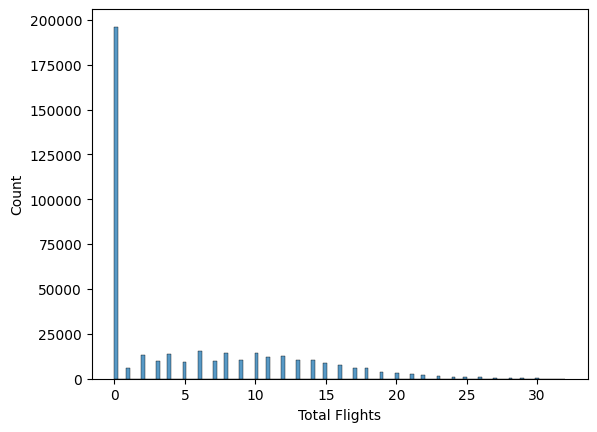

In [245]:
sns.histplot(df, x="Total Flights")